<a href="https://colab.research.google.com/github/JunaidRaza78/RI-Software-Predictive-models/blob/main/Copy_of_Profitability_by_Customer_or_Segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Profitability by Customer or Segment** (Analyze profitability by customer, product, or business segment. Focus resources on high-margin areas.)


In [ ]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Create a mock dataset for products
products_data = {
    'ProductID': np.arange(1, 101),
    'ProductName': [f'Product_{i}' for i in range(1, 101)]
}

products_df = pd.DataFrame(products_data)

# Create a mock dataset for customers
customers_data = {
    'CustomerID': np.arange(1, 501),
    'CustomerName': [f'Customer_{i}' for i in range(1, 501)],
    'Age': np.random.randint(18, 60, size=500),
    'Gender': np.random.choice(['Male', 'Female'], size=500),
    'CompanyType': np.random.choice(['Tech', 'Retail', 'Finance'], size=500),
    'PurchaseAmount': np.random.uniform(10, 300, size=500),
}

customers_df = pd.DataFrame(customers_data)


# Create a mock dataset for sales
sales_data = {
    'TransactionID': np.arange(1, 1001),
    'ProductID': np.random.choice(np.arange(1, 101), size=1000),
    'CustomerID': np.random.choice(np.arange(1, 501), size=1000),
    'Quantity': np.random.randint(1, 10, size=1000),
    'Revenue': np.random.uniform(20, 500, size=1000),
}

sales_df = pd.DataFrame(sales_data)

# Create a mock dataset for pricing strategies
pricing_data = {
    'ProductID': np.arange(1, 101),
    'BasePrice': np.random.uniform(50, 200, size=100),
    'DiscountRate': np.random.uniform(0.05, 0.3, size=100),
}

pricing_df = pd.DataFrame(pricing_data)

# Create a mock dataset for expenses
expenses_data = {
    'ProductID': np.arange(1, 101),
    'EmployeeExpenses': np.random.uniform(1, 5, size=100),
    'OfficeExpenses': np.random.uniform(5, 10, size=100),
    'MarketingExpenses': np.random.uniform(1, 3, size=100),
    'MaintenanceExpenses': np.random.uniform(2, 6, size=100),
    'Month': pd.to_datetime(np.random.randint(1, 13, size=100), format='%m').strftime('%B')
}

expenses_df = pd.DataFrame(expenses_data)

# Merge datasets
df = pd.merge(sales_df, products_df, on='ProductID')
df = pd.merge(df, customers_df, on='CustomerID')
df = pd.merge(df, pricing_df, on='ProductID')
df = pd.merge(df, expenses_df, on='ProductID')

# Display the first few rows of the merged dataset
df.head()


,TransactionID,ProductID,CustomerID,Quantity,Revenue,ProductName,CustomerName,Age,Gender,CompanyType,PurchaseAmount,BasePrice,DiscountRate,EmployeeExpenses,OfficeExpenses,MarketingExpenses,MaintenanceExpenses,Month
0,1,77,486,8,68.469491,Product_77,Customer_486,38,Male,Finance,279.975122,90.374236,0.295685,3.539627,9.554131,2.194625,2.15969,December
1,101,77,150,7,439.554451,Product_77,Customer_150,45,Male,Tech,47.559327,90.374236,0.295685,3.539627,9.554131,2.194625,2.15969,December
2,183,77,270,4,444.730456,Product_77,Customer_270,35,Male,Tech,63.802400,90.374236,0.295685,3.539627,9.554131,2.194625,2.15969,December
3,250,77,62,2,185.099690,Product_77,Customer_62,51,Male,Retail,182.918265,90.374236,0.295685,3.539627,9.554131,2.194625,2.15969,December
4,517,77,437,5,297.347384,Product_77,Customer_437,48,Female,Finance,254.809430,90.374236,0.295685,3.539627,9.554131,2.194625,2.15969,December


In [ ]:
import pandas as pd

# Columns representing fixed costs
fixed_costs_columns = ['EmployeeExpenses', 'OfficeExpenses', 'MarketingExpenses', 'MaintenanceExpenses']

# Calculate total fixed costs for each transaction
df['TotalFixedCosts'] = df[fixed_costs_columns].sum(axis=1)

# Display the first few rows of the DataFrame with the new TotalFixedCosts column
print(df[['TransactionID', 'TotalFixedCosts']].head())


   TransactionID  TotalFixedCosts
0              1        17.448073
1            101        17.448073
2            183        17.448073
3            250        17.448073
4            517        17.448073


In [ ]:
import pandas as pd
# Columns representing variable costs
variable_costs_columns = ['EmployeeExpenses', 'OfficeExpenses', 'MarketingExpenses', 'MaintenanceExpenses']

# Calculate total variable costs for each transaction
df['TotalVariableCosts'] = df[variable_costs_columns].sum(axis=1)

# Display the first few rows of the DataFrame with the new TotalVariableCosts column
print(df[['TransactionID', 'TotalVariableCosts']].head())


   TransactionID  TotalVariableCosts
0              1           17.448073
1            101           17.448073
2            183           17.448073
3            250           17.448073
4            517           17.448073


In [ ]:
import pandas as pd


# Calculate total costs (fixed costs + variable costs)
df['TotalCosts'] = df['TotalFixedCosts'] + df['TotalVariableCosts']

# Calculate profit as the difference between revenue and total costs
df['Profit'] = df['Revenue'] - df['TotalCosts']

# Calculate profit margin as the ratio of profit to revenue
df['ProfitMargin %'] = (df['Profit'] / df['Revenue']) * 100

# Calculate total revenue per customer
total_revenue_per_customer = df.groupby('CustomerID')['Revenue'].sum().reset_index()

# Calculate total profit per customer
total_profit_per_customer = df.groupby('CustomerID')['Profit'].sum().reset_index()

# Calculate average profit margin per customer
average_profit_margin_per_customer = df.groupby('CustomerID')['ProfitMargin %'].mean().reset_index()

# Merge the metrics into a single DataFrame
customer_profitability = pd.merge(total_revenue_per_customer, total_profit_per_customer, on='CustomerID')
customer_profitability = pd.merge(customer_profitability, average_profit_margin_per_customer, on='CustomerID')

# Identify high-profit customers
high_profit_customers = customer_profitability.nlargest(10, 'Profit')

# Display the results
print("Customer Profitability Metrics:")
customer_profitability.head()




Customer Profitability Metrics:


,CustomerID,Revenue,Profit,ProfitMargin %
0,1,1218.324145,1118.068163,91.320840
1,2,484.155243,418.140715,74.745273
2,4,118.135219,89.249790,75.548842
3,5,616.113951,543.786234,87.956517
4,7,175.678101,137.912185,78.502775


In [ ]:
print("\nTop 10 High-Profit Customers:")
high_profit_customers


Top 10 High-Profit Customers:


,CustomerID,Revenue,Profit,ProfitMargin %
124,147,2367.012582,2101.570953,85.978242
360,424,2123.761448,1907.329905,88.310488
311,369,2007.149072,1805.430843,89.101514
26,35,1935.286233,1728.512202,85.698831
219,260,1898.511227,1655.847116,83.888445
408,476,1827.686380,1624.838086,86.187801
250,294,1748.444066,1575.045652,88.607963
30,41,1577.725751,1394.792769,70.339629
106,127,1580.646324,1391.986574,87.371737
261,307,1548.098894,1379.628300,87.731149


In [ ]:
import pandas as pd


# Calculate total revenue per segment
total_revenue_per_segment = df.groupby('CompanyType')['Revenue'].sum().reset_index()

# Calculate total profit per segment
total_profit_per_segment = df.groupby('CompanyType')['Profit'].sum().reset_index()

# Calculate average profit margin per segment
average_profit_margin_per_segment = df.groupby('CompanyType')['ProfitMargin %'].mean().reset_index()

# Merge the metrics into a single DataFrame
segment_profitability = pd.merge(total_revenue_per_segment, total_profit_per_segment, on='CompanyType')
segment_profitability = pd.merge(segment_profitability, average_profit_margin_per_segment, on='CompanyType')

# Display the results
print("Segment Profitability Metrics:")
segment_profitability


Segment Profitability Metrics:


,CompanyType,Revenue,Profit,ProfitMargin %
0,Finance,80498.534055,70126.361037,77.921303
1,Retail,88404.288522,76767.175152,78.128369
2,Tech,83514.042561,73011.106397,77.032051


In [ ]:
import pandas as pd


# Calculate total revenue per product
total_revenue_per_product = df.groupby('ProductName')['Revenue'].sum().reset_index()

# Calculate total profit per product
total_profit_per_product = df.groupby('ProductName')['Profit'].sum().reset_index()

# Calculate average profit margin per product
average_profit_margin_per_product = df.groupby('ProductName')['ProfitMargin %'].mean().reset_index()

# Merge the metrics into a single DataFrame
product_profitability = pd.merge(total_revenue_per_product, total_profit_per_product, on='ProductName')
product_profitability = pd.merge(product_profitability, average_profit_margin_per_product, on='ProductName')

# Identify high-profit products
high_profit_products = product_profitability.nlargest(10, 'Profit')

# Display the results
print("Product Profitability Metrics:")
product_profitability



Product Profitability Metrics:


,ProductName,Revenue,Profit,ProfitMargin %
0,Product_1,1308.608758,1101.246897,78.110105
1,Product_10,3251.404578,2710.877000,70.284748
2,Product_100,1931.874009,1681.850020,80.189814
3,Product_11,1971.773214,1736.767313,71.161618
4,Product_12,2702.083422,2369.872683,75.286626
...,...,...,...,...
95,Product_95,1395.319730,1161.364117,65.286817
96,Product_96,1823.213373,1577.183622,81.613825
97,Product_97,1828.511794,1570.490085,83.147712
98,Product_98,3349.785622,2859.699864,71.452303


In [ ]:
print("\nTop 10 High-Profit Products:")
high_profit_products


Top 10 High-Profit Products:


,ProductName,Revenue,Profit,ProfitMargin %
14,Product_21,7295.019325,6399.371271,78.470401
68,Product_70,5210.665571,4656.128622,87.235854
57,Product_60,5215.570593,4419.434458,72.423638
7,Product_15,4718.947369,4159.584274,80.893194
85,Product_86,4428.085379,3914.314550,77.558860
78,Product_8,4015.836232,3612.256487,88.340590
67,Product_7,3687.034573,3338.755883,85.168007
30,Product_36,3903.956362,3326.782117,74.411568
92,Product_92,3614.131932,3267.506789,86.953230
88,Product_89,3759.746232,3238.206240,64.981881


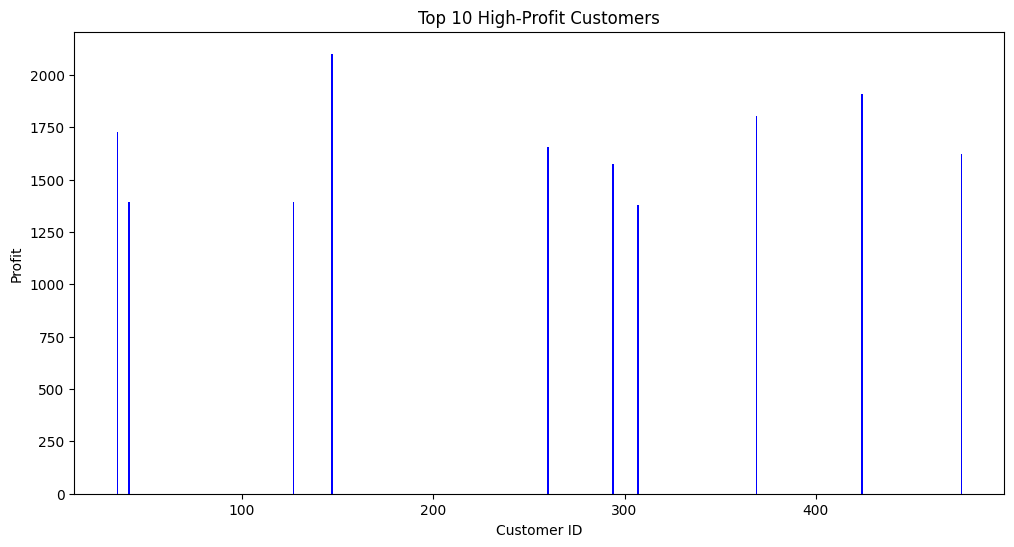

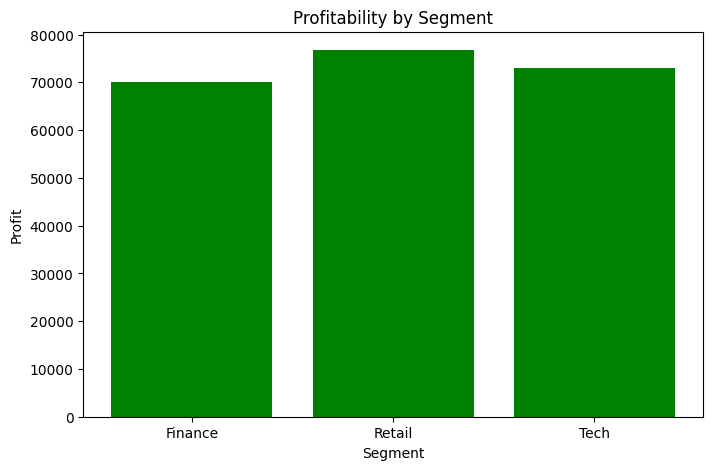

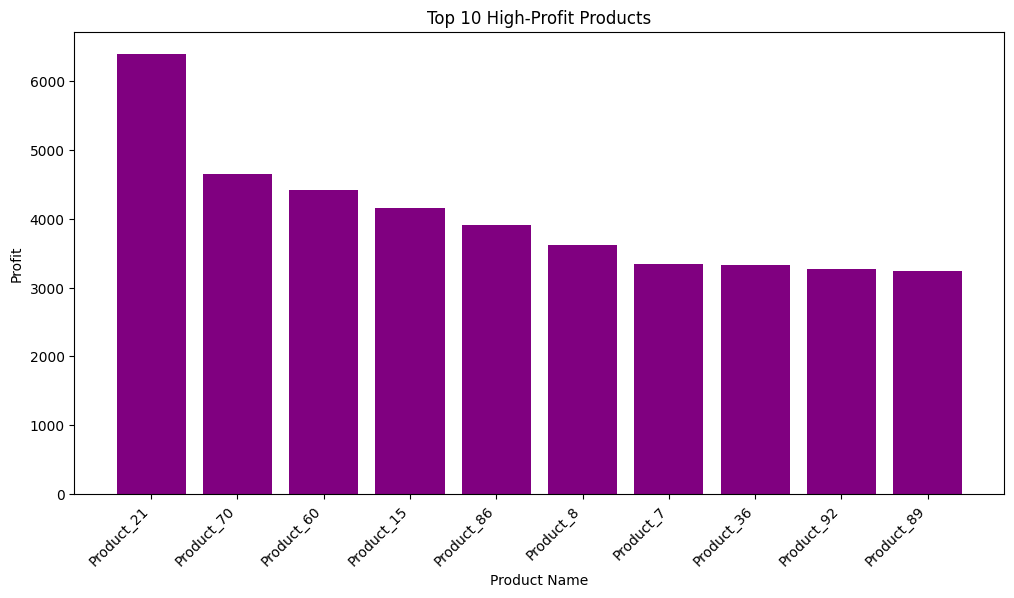

In [ ]:
import matplotlib.pyplot as plt

# Visualize high-profit customers
plt.figure(figsize=(12, 6))
plt.bar(high_profit_customers['CustomerID'], high_profit_customers['Profit'], color='blue')
plt.title('Top 10 High-Profit Customers')
plt.xlabel('Customer ID')
plt.ylabel('Profit')
plt.show()

# Visualize high-profit segments
plt.figure(figsize=(8, 5))
plt.bar(segment_profitability['CompanyType'], segment_profitability['Profit'], color='green')
plt.title('Profitability by Segment')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.show()

# Visualize high-profit products
plt.figure(figsize=(12, 6))
plt.bar(high_profit_products['ProductName'], high_profit_products['Profit'], color='purple')
plt.title('Top 10 High-Profit Products')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Profitibility on Customer
performance_dict = {}

for CustomerID, data in df.groupby('CustomerID'):
      key = f'Custumer_{CustomerID}_Profit'
      performance_dict[key] = []

      for idx, row in data.iterrows():
          performance_dict[key].append({
              'label': row['Month'],
              'value': row['Profit'],
          })
print(performance_dict)

{'Custumer_1_Profit': [{'label': 'February', 'value': 382.1961195143586}, {'label': 'July', 'value': 270.43007205584274}, {'label': 'June', 'value': 465.44197124896726}], 'Custumer_2_Profit': [{'label': 'June', 'value': 373.43536793118113}, {'label': 'February', 'value': 44.70534693530017}], 'Custumer_4_Profit': [{'label': 'October', 'value': 89.24979023769387}], 'Custumer_5_Profit': [{'label': 'May', 'value': 222.9385144279915}, {'label': 'May', 'value': 320.84771949955154}], 'Custumer_7_Profit': [{'label': 'April', 'value': 137.91218462379408}], 'Custumer_8_Profit': [{'label': 'August', 'value': 349.4542778053926}, {'label': 'October', 'value': 388.1077343701967}, {'label': 'June', 'value': 168.15347316782447}, {'label': 'August', 'value': 388.45288180971517}], 'Custumer_10_Profit': [{'label': 'January', 'value': 181.24151139084478}], 'Custumer_12_Profit': [{'label': 'May', 'value': 192.79959776079457}, {'label': 'February', 'value': 441.3997024082469}, {'label': 'May', 'value': 58.6

In [ ]:
# Profitibility on Product
performance_dict = {}

for ProductID, data in df.groupby('ProductName'):
      key = f'ProductID_{ProductID}_Profit'
      performance_dict[key] = []

      for idx, row in data.iterrows():
          performance_dict[key].append({
              'label': row['Month'],
              'value': row['Profit'],
          })
print(performance_dict)

{'ProductID_Product_1_Profit': [{'label': 'August', 'value': 191.83259268084964}, {'label': 'August', 'value': 311.6943539827467}, {'label': 'August', 'value': 155.99316917020707}, {'label': 'August', 'value': 282.7468751986619}, {'label': 'August', 'value': 132.19678947744072}, {'label': 'August', 'value': 26.783116653307538}], 'ProductID_Product_10_Profit': [{'label': 'August', 'value': 129.1209218356347}, {'label': 'August', 'value': 271.8338561943816}, {'label': 'August', 'value': 133.81474341856563}, {'label': 'August', 'value': 267.3172028924574}, {'label': 'August', 'value': 0.7147287393545696}, {'label': 'August', 'value': 226.12081187914288}, {'label': 'August', 'value': 289.313038297924}, {'label': 'August', 'value': 317.68440556426}, {'label': 'August', 'value': 2.989361487926857}, {'label': 'August', 'value': 123.43826142449889}, {'label': 'August', 'value': 32.210560037225235}, {'label': 'August', 'value': 387.89675502082054}, {'label': 'August', 'value': 147.3778145319271

In [ ]:
import pandas as pd


# Calculate profit margin for each transaction
df['Profit_Margin'] = (df['Revenue'] - df['PurchaseAmount']) / df['Revenue']


# Aggregate profit margin by ProductID
product_profitability = df.groupby('ProductID')['Profit_Margin'].mean().reset_index()

# Aggregate profit margin by CustomerID
customer_profitability = df.groupby('CustomerID')['Profit_Margin'].mean().reset_index()

# Aggregate profit margin by Business Segment (e.g., CompanyType)
segment_profitability = df.groupby('CompanyType')['Profit_Margin'].mean().reset_index()

# Identify top-performing products, customers, and segments
top_products = product_profitability.sort_values(by='Profit_Margin', ascending=False).head(10)
top_customers = customer_profitability.sort_values(by='Profit_Margin', ascending=False).head(10)
top_segments = segment_profitability.sort_values(by='Profit_Margin', ascending=False)

# Display the results
print("Top-Performing Products:")
print(top_products)

print("\nTop-Performing Customers:")
print(top_customers)


Top-Performing Products:
    ProductID  Profit_Margin
42         43       0.659398
87         88       0.604410
28         29       0.571086
68         69       0.561083
66         67       0.540117
24         25       0.480358
65         66       0.434098
8           9       0.433362
7           8       0.423406
91         92       0.392441

Top-Performing Customers:
     CustomerID  Profit_Margin
268         314       0.969850
392         457       0.960915
235         278       0.959487
281         331       0.958936
48           61       0.956402
251         295       0.949078
197         233       0.941380
369         433       0.940219
3             5       0.936582
196         232       0.926472


In [ ]:
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Create dictionaries with timestamps
top_products_dict = {

        'ProductID': top_products['ProductID'].tolist(),
        'timestamp': timestamp,
        'Profit_Margin': top_products['Profit_Margin'].tolist()
    }

top_customers_dict = {
        'CustomerID': top_customers['CustomerID'].tolist(),
        'timestamp': timestamp,
        'Profit_Margin': top_customers['Profit_Margin'].tolist()

}

top_segments_dict = {
        'CompanyType': top_segments['CompanyType'].tolist(),
        'timestamp': timestamp,
        'Profit_Margin': top_segments['Profit_Margin'].tolist()
    }

# Display the results
print("Top-Performing Products:")
print(top_products_dict)

print("\nTop-Performing Customers:")
print(top_customers_dict)

print("\nProfitability by Business Segment:")
print(top_segments_dict)



Top-Performing Products:
{'ProductID': [43, 88, 29, 69, 67, 25, 66, 9, 8, 92], 'timestamp': '2024-01-03 15:13:44', 'Profit_Margin': [0.6593979699782164, 0.6044101061934785, 0.5710863173055145, 0.5610832833514167, 0.5401165357722106, 0.48035780651434334, 0.43409798141271144, 0.4333624231095983, 0.4234062851470592, 0.3924406433644094]}

Top-Performing Customers:
{'CustomerID': [314, 457, 278, 331, 61, 295, 233, 433, 5, 232], 'timestamp': '2024-01-03 15:13:44', 'Profit_Margin': [0.9698501015164439, 0.960915424585959, 0.9594870057801992, 0.9589362587896063, 0.9564019320325017, 0.9490777321489298, 0.941380444471166, 0.9402187402748533, 0.9365816098801472, 0.9264716893417715]}

Profitability by Business Segment:
{'CompanyType': ['Finance', 'Retail', 'Tech'], 'timestamp': '2024-01-03 15:13:44', 'Profit_Margin': [-0.07679125947733062, -0.09685146093621598, -0.12071308964989344]}
